In [15]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
from scipy.signal import argrelextrema
import numpy as np
from matplotlib import pyplot as plt

filename = "tyler.wav"


# ==============================================

time_period = 1 # FFT time period (in seconds). Can comfortably process time frames from 0.05 seconds - 10 seconds

# ==============================================

fs_rate, signal_original = wavfile.read(filename)
total_time = int(np.floor(len(signal_original)/fs_rate))
sample_range = np.arange(0,total_time,time_period)
total_samples = len(sample_range)

print ("Frequency sampling", fs_rate)
print ("total time: ", total_time)
print ("sample time period: ", time_period)
print ("total samples: ", total_samples)

output_array = []
for i in sample_range:

    print ("Processing: %d / %d (%d%%)" % (i/time_period + 1, total_samples, (i/time_period + 1)*100/total_samples))

    sample_start = int(i*fs_rate)
    sample_end = int((i+time_period)*fs_rate)
    signal = signal_original[sample_start:sample_end]

    
    l_audio = len(signal.shape)
    #print ("Channels", l_audio)

    if l_audio == 2:
        signal = signal.sum(axis=1) / 2
    N = signal.shape[0]
    #print ("Complete Samplings N", N)

    secs = N / float(fs_rate)
    # print ("secs", secs)
    Ts = 1.0/fs_rate # sampling interval in time
    #print ("Timestep between samples Ts", Ts)

    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray

    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(int(N/2))] # one side FFT range
    freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
    fft_freqs = np.array(freqs)
    freqs_side = freqs[range(int(N/2))] # one side frequency range
    fft_freqs_side = np.array(freqs_side)

    # Reduce to 0-5000 Hz
    bucket_size = 20
    buckets = 16

    FFT_side = FFT_side[0:bucket_size*buckets]
    fft_freqs_side = fft_freqs_side[0:bucket_size*buckets]

    # Combine frequencies into buckets
    FFT_side = np.array([int(sum(FFT_side[current: current+bucket_size])) for current in range(0, len(FFT_side), bucket_size)])
    fft_freqs_side = np.array([int(sum(fft_freqs_side[current: current+bucket_size])) for current in range(0, len(fft_freqs_side), bucket_size)])

    # FFT_side: Normalize (0-1)
    max_value = max(FFT_side)
    if (max_value != 0):
        FFT_side_norm = FFT_side / max_value

    # Append to output array
    output_array.append(FFT_side_norm)
    
fingerprint = abs(FFT_side_norm)

print(fingerprint)

    
# ============================================



Frequency sampling 48000
total time:  20
sample time period:  1
total samples:  20
Processing: 1 / 20 (5%)
Processing: 2 / 20 (10%)
Processing: 3 / 20 (15%)
Processing: 4 / 20 (20%)
Processing: 5 / 20 (25%)
Processing: 6 / 20 (30%)
Processing: 7 / 20 (35%)
Processing: 8 / 20 (40%)
Processing: 9 / 20 (45%)
Processing: 10 / 20 (50%)
Processing: 11 / 20 (55%)
Processing: 12 / 20 (60%)
Processing: 13 / 20 (65%)
Processing: 14 / 20 (70%)
Processing: 15 / 20 (75%)
Processing: 16 / 20 (80%)
Processing: 17 / 20 (85%)
Processing: 18 / 20 (90%)
Processing: 19 / 20 (95%)
Processing: 20 / 20 (100%)
[0.14112344 0.06952711 0.08910117 0.16654644 0.33784761 0.24616993
 0.92745424 0.48507347 0.33984693 0.43485961 0.44726484 0.37013433
 0.57663084 1.         0.84133715 0.44747777]


/tmp/ipykernel_3330/3562248658.py:54: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray


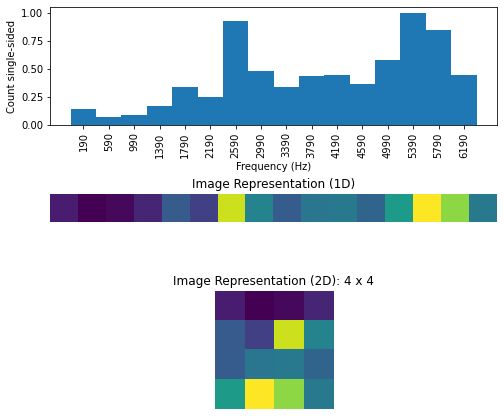

In [16]:
# Plotting


plt.figure(figsize=(8,10))

plt.subplot(412)
diff = np.diff(fft_freqs_side)
widths = np.hstack([diff, diff[-1]])
plt.bar(fft_freqs_side, abs(FFT_side_norm), width=widths) # plotting the positive fft spectrum
plt.xticks(fft_freqs_side, fft_freqs_side, rotation='vertical')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')

FFT_side_norm_line = FFT_side_norm.copy()
FFT_side_norm_line.resize( (1,buckets) )

plt.subplot(413)
plt.imshow(FFT_side_norm_line)
plt.axis('off')
plt.title('Image Representation (1D)')

width_img = int(np.sqrt(buckets))
height_img = int(np.ceil(buckets / int(np.sqrt(buckets))))
FFT_side_norm_rect = FFT_side_norm.copy()
FFT_side_norm_rect.resize( (width_img,height_img) )

plt.subplot(414)
plt.imshow(FFT_side_norm_rect)
plt.axis('off')
plt.title('Image Representation (2D): %d x %d' % (width_img,height_img))

plt.show()